<a href="https://colab.research.google.com/github/Lrizika/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module4-makefeatures/LS_DS_114_Make_Features_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# ASSIGNMENT

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.

- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.



---


*Lecture notes below*


---






# Make features

Objectives
-  understand the purpose of feature engineering
-  work with strings in pandas
- work with dates and times in pandas

Links
- [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
- Python Data Science Handbook
  - [Chapter 3.10](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html), Vectorized String Operations
  - [Chapter 3.11](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html), Working with Time Series
- [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)

## Get LendingClub data

[Source](https://www.lendingclub.com/info/download-data.action)

In [1]:
!wget -O LoanStats_2018Q4.csv.zip "https://github.com/Lrizika/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module4-makefeatures/LoanStats_2018Q4.csv.zip?raw=true"

--2019-09-05 20:52:40--  https://github.com/Lrizika/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module4-makefeatures/LoanStats_2018Q4.csv.zip?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Lrizika/DS-Unit-1-Sprint-1-Dealing-With-Data/raw/master/module4-makefeatures/LoanStats_2018Q4.csv.zip [following]
--2019-09-05 20:52:41--  https://github.com/Lrizika/DS-Unit-1-Sprint-1-Dealing-With-Data/raw/master/module4-makefeatures/LoanStats_2018Q4.csv.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Lrizika/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module4-makefeatures/LoanStats_2018Q4.csv.zip [following]
--2019-09-05 20:52:41--  https://raw.githubusercontent.com/Lrizika/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module4-makefeatures/Lo

In [2]:
!unzip -o LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


In [3]:
!head LoanStats_2018Q4.csv
!tail LoanStats_2018Q4.csv

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","op

## Load LendingClub data

pandas documentation
- [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)
- [`options.display`](https://pandas.pydata.org/pandas-docs/stable/options.html#available-options)

In [4]:
import pandas
df_loans = pandas.read_csv(
    'LoanStats_2018Q4.csv', 
    skiprows=1, 
    skipfooter=2, 
    quotechar='"', 
    skipinitialspace=True
  )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  import sys


In [5]:

print(df_loans.isna().sum())
df_loans.describe()
#df_loans.head(15)


id                                            128412
member_id                                     128412
loan_amnt                                          0
funded_amnt                                        0
funded_amnt_inv                                    0
term                                               0
int_rate                                           0
installment                                        0
grade                                              0
sub_grade                                          0
emp_title                                      20947
emp_length                                     11704
home_ownership                                     0
annual_inc                                         0
verification_status                                0
issue_d                                            0
loan_status                                        0
pymnt_plan                                         0
url                                           

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,url,desc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,...,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,128412.000000,128412.000000,128412.000000,128412.000000,1.284120e+05,0.0,0.0,128175.000000,128412.000000,128412.000000,56216.000000,15450.000000,128412.000000,128412.000000,1.284120e+05,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,29180.000000,128412.0,1.678200e+04,16782.000000,128412.0,128412.000000,1.284120e+05,128412.000000,128412.000000,128412.000000,128412.000000,...,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,125553.0,128412.0,128412.000000,128412.000000,128412.000000,126720.000000,128412.000000,128412.0,1.284120e+05,1.284120e+05,128412.000000,1.284120e+05,1.678200e+04,16782.000000,16782.000000,16782.000000,16524.000000,16782.000000,16782.000000,16782.000000,16782.000000,5154.000000,27.0,27.000000,27.0,27.000000,26.000000,27.000000,27.000000,111.000000,111.000000,111.000000
mean,NaN,NaN,15971.321021,15971.321021,15968.498166,463.254376,8.279733e+04,NaN,NaN,19.933178,0.227837,0.447038,36.880337,86.130162,11.564052,0.121850,1.689800e+04,22.677413,11628.759791,11626.930092,5393.350553,5392.183328,4069.270396,1318.012513,0.519020,5.548623,0.998752,1705.795743,0.017958,46.553461,1.0,1.335516e+05,19.226602,0.0,188.304286,1.467922e+05,0.939507,2.760202,0.689071,1.572665,...,5.414128,4.882129,7.065944,8.288524,8.199210,12.866702,5.386342,11.546717,0.0,0.0,0.059488,2.011642,94.659843,32.900756,0.121733,0.0,1.884852e+05,5.356097e+04,27439.534163,4.682180e+04,3.664280e+04,0.585985,1.587177,11.436003,55.878831,3.027112,12.423907,0.036170,0.062984,38.515910,3.0,211.769630,3.0,13.851852,654.789231,14635.793704,316.892593,7330.395946,53.095495,18.045045
std,NaN,NaN,10150.384233,10150.384233,10152.168970,285.718332,1.082985e+05,NaN,NaN,20.143542,0.733793,0.734480,21.813805,21.880055,5.981599,0.332825,2.408255e+04,12.129216,9282.436085,9283.150521,5494.550279,5494.614849,5251.332554,1079.024880,5.568991,165.257042,29.746268,4749.147467,0.146569,21.801716,0.0,9.687001e+04,8.141631,0.0,1569.290033,1.738727e+05,1.145306,2.942377,0.935776,1.565118,...,3.439644,3.205305,4.517165,7.389195,4.958905,7.873911,3.388380,5.977599,0.0,0.0,0.410652,1.880559,8.989288,34.899647,0.332552,0.0,1.965536e+05,5.599335e+04,26377.282557,4.957491e+04,3.252566e+04,0.936053,1.801878,6.690119,26.071241,3.254318,8.190067,0.347726,0.364083,23.659436,0.0,125.786417,0.0,7.583909,370.729150,7527.834921,231.449666,4682.992392,10.260846,6.577354
min,NaN,NaN,1000.000000,1000.000000,725.000000,30.480000,0.000000e+00,NaN,NaN,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000

In [6]:

# Keep rows with >= 10 values, and columns with >= 1000
df_cleaned = df_loans.dropna(axis='columns', thresh=1000).dropna(axis='rows', thresh=10)
# Our remaining NaNs
df_cleaned.isna().sum()[df_cleaned.isna().sum()>0]


emp_title                               20947
emp_length                              11704
dti                                       237
mths_since_last_delinq                  72196
mths_since_last_record                 112962
revol_util                                156
last_pymnt_d                              159
next_pymnt_d                            16123
last_credit_pull_d                          1
mths_since_last_major_derog             99232
annual_inc_joint                       111630
dti_joint                              111630
verification_status_joint              113564
mths_since_rcnt_il                       4478
il_util                                 20274
all_util                                   37
avg_cur_bal                                13
bc_open_to_buy                           1691
bc_util                                  1754
mo_sin_old_il_acct                       4478
mths_since_recent_bc                     1591
mths_since_recent_bc_dlq          

In [0]:

def toNumeric(percent_string: str):
  """
  Converts a string in the format '1.23%' to a numeric data type
  
  Arguments:
    percent_string (str): Input string
    
  Returns:
    numeric: Numeric ratio
  """
  return(pandas.to_numeric(str.strip(percent_string, '%'))/100)

df_cleaned['int_rate_num'] = df_cleaned['int_rate'].apply(toNumeric)
# .map would also work here


In [8]:
df_cleaned.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,...,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,int_rate_num
count,128412.000000,128412.000000,128412.000000,128412.000000,1.284120e+05,128175.000000,128412.000000,128412.000000,56216.000000,15450.000000,128412.000000,128412.000000,1.284120e+05,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,29180.000000,128412.0,1.678200e+04,16782.000000,128412.0,128412.000000,1.284120e+05,128412.000000,128412.000000,128412.000000,128412.000000,123934.000000,1.284120e+05,108138.000000,128412.000000,...,128412.000000,128412.000000,128412.000000,126821.000000,25169.000000,112365.000000,36782.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,125553.0,128412.0,128412.000000,128412.000000,128412.000000,126720.000000,128412.000000,128412.0,1.284120e+05,1.284120e+05,128412.000000,1.284120e+05,1.678200e+04,16782.000000,16782.000000,16782.000000,16524.000000,16782.000000,16782.000000,16782.000000,16782.000000,5154.000000,128412.000000
mean,15971.321021,15971.321021,15968.498166,463.254376,8.279733e+04,19.933178,0.227837,0.447038,36.880337,86.130162,11.564052,0.121850,1.689800e+04,22.677413,11628.759791,11626.930092,5393.350553,5392.183328,4069.270396,1318.012513,0.519020,5.548623,0.998752,1705.795743,0.017958,46.553461,1.0,1.335516e+05,19.226602,0.0,188.304286,1.467922e+05,0.939507,2.760202,0.689071,1.572665,20.201519,3.627228e+04,68.211757,1.195901,...,15.431634,8.635400,1.323155,26.013957,40.415233,7.552832,37.817275,0.461553,3.659876,5.414128,4.882129,7.065944,8.288524,8.199210,12.866702,5.386342,11.546717,0.0,0.0,0.059488,2.011642,94.659843,32.900756,0.121733,0.0,1.884852e+05,5.356097e+04,27439.534163,4.682180e+04,3.664280e+04,0.585985,1.587177,11.436003,55.878831,3.027112,12.423907,0.036170,0.062984,38.515910,0.129298
std,10150.384233,10150.384233,10152.168970,285.718332,1.082985e+05,20.143542,0.733793,0.734480,21.813805,21.880055,5.981599,0.332825,2.408255e+04,12.129216,9282.436085,9283.150521,5494.550279,5494.614849,5251.332554,1079.024880,5.568991,165.257042,29.746268,4749.147467,0.146569,21.801716,0.0,9.687001e+04,8.141631,0.0,1569.290033,1.738727e+05,1.145306,2.942377,0.935776,1.565118,24.869930,4.726387e+04,23.589461,1.470123,...,19.053976,9.573207,1.713149,34.306721,22.305270,6.057088,22.023835,1.349412,2.448079,3.439644,3.205305,4.517165,7.389195,4.958905,7.873911,3.388380,5.977599,0.0,0.0,0.410652,1.880559,8.989288,34.899647,0.332552,0.0,1.965536e+05,5.599335e+04,26377.282557,4.957491e+04,3.252566e+04,0.936053,1.801878,6.690119,26.071241,3.254318,8.190067,0.347726,0.364083,23.659436,0.050907
min,100

## Work with strings

For machine learning, we usually want to replace strings with numbers.

We can get info about which columns have a datatype of "object" (strings)

### Convert `int_rate`

Define a function to remove percent signs from strings and convert to floats

Apply the function to the `int_rate` column

### Clean `emp_title`

Look at top 20 titles

In [9]:
for i in df_cleaned['emp_title'].value_counts(dropna=False).head(20).index.unique():
  if 'Super' in str(i):
    print(f'"{i}"')

"Supervisor"
"Supervisor "


How often is `emp_title` null?

Clean the title and handle missing values

In [10]:



def cleanTitle(title):
  
  title = str(title).strip().lower()
  if title == 'nan': title = 'n/a'
    
    
  def isManager(title):
    if 'manager' in title: return(True)
    return(False)
  def isNurse(title):
    if 'nurse' in title: return(True)
    if title == 'rn': return(True)
    return(False)
  def isSecretary(title):
    return(title in ['administrative assistant', 'executive assistant'])
  titleMappings = {
      'manager': isManager,
      'nurse': isNurse,
      'secretary': isSecretary
  }
  
  for mapping in titleMappings:
    if titleMappings[mapping](title):
      title = mapping
      break
    
  return(title)

df_cleaned['emp_title_cleaned'] = df_cleaned['emp_title'].apply(cleanTitle)

df_cleaned['emp_title_cleaned'].value_counts(dropna=False).head(40)


n/a                  20949
manager              17885
nurse                 3514
teacher               2557
driver                1258
supervisor            1160
truck driver           920
secretary              851
sales                  803
owner                  625
director               523
police officer         440
technician             420
engineer               412
mechanic               391
server                 357
vice president         352
accountant             335
foreman                302
electrician            302
president              293
machine operator       284
customer service       283
operator               267
attorney               264
maintenance            254
paralegal              249
superintendent         248
bartender              237
software engineer      221
cashier                215
analyst                214
medical assistant      212
machinist              209
cook                   200
cna                    196
sales associate        191
c

### Create `emp_title_manager`

pandas documentation: [`str.contains`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.contains.html)

In [11]:
df_cleaned['emp_title_manager'] = df_cleaned['emp_title_cleaned'] == 'manager'

df_cleaned[df_cleaned['emp_title_manager'] == True].describe()


,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,...,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,int_rate_num
count,17885.000000,17885.000000,17885.000000,17885.000000,1.788500e+04,17884.000000,17885.000000,17885.000000,8061.000000,2034.000000,17885.000000,17885.000000,17885.000000,17885.000000,17885.000000,17885.000000,17885.000000,17885.000000,17885.000000,17885.000000,17885.000000,17885.00000,17885.000000,17885.000000,17885.000000,4166.000000,17885.0,1917.000000,1917.000000,17885.0,17885.000000,1.788500e+04,17885.000000,17885.000000,17885.000000,17885.000000,17485.000000,1.788500e+04,15671.000000,17885.000000,...,17885.000000,17885.000000,17885.000000,17743.000000,3637.000000,15937.000000,5246.000000,17885.000000,17885.000000,17885.000000,17885.000000,17885.000000,17885.000000,17885.000000,17885.000000,17885.000000,17885.000000,17452.0,17885.0,17885.000000,17885.000000,17885.000000,17733.000000,17885.000000,17885.0,1.788500e+04,1.788500e+04,17885.000000,1.788500e+04,1917.000000,1917.000000,1917.000000,1917.000000,1892.000000,1917.000000,1917.000000,1917.000000,1917.000000,554.000000,17885.000000
mean,17357.948001,17357.948001,17355.083799,497.616563,9.289494e+04,19.090393,0.233324,0.450210,37.107059,86.990167,12.220688,0.115068,18990.511826,23.744367,12634.598632,12632.769415,5866.605167,5865.382925,4440.171445,1420.743117,0.505264,5.18534,0.933361,1914.881173,0.020632,47.209073,1.0,144508.729457,19.384794,0.0,199.683366,1.665774e+05,0.979983,2.960134,0.743193,1.716522,18.172262,3.922299e+04,67.963372,1.199776,...,15.238468,8.135085,1.467990,25.309981,41.038218,7.482148,38.135532,0.487112,3.922393,5.714453,5.230696,7.452726,8.776125,8.587196,13.275259,5.683030,12.204864,0.0,0.0,0.058261,2.089852,94.589992,33.824841,0.115068,0.0,2.118400e+05,5.861848e+04,30611.099301,5.132094e+04,39984.530516,0.539384,1.660929,11.719353,55.467812,3.116849,12.439228,0.032342,0.060511,40.272563,0.127605
std,10360.084113,10360.084113,10361.899954,289.716290,9.451115e+04,11.239136,0.769706,0.737033,21.865568,21.288913,5.989777,0.323637,22045.995269,12.158627,9658.670690,9659.301800,5809.578226,5809.674826,5600.184899,1115.204946,6.082422,139.32110,25.077798,5155.199708,0.153864,21.730373,0.0,62744.696929,7.681462,0.0,1336.880016,1.703734e+05,1.160918,2.892974,0.960861,1.606239,21.627997,4.518219e+04,22.737358,1.489041,...,18.740553,8.517509,1.749955,32.790950,22.646466,5.973246,22.225564,1.404817,2.512085,3.565431,3.256329,4.585499,7.283825,5.017144,7.872417,3.504368,5.987748,0.0,0.0,0.439679,1.914620,8.947790,34.754609,0.323637,0.0,1.895224e+05,5.234451e+04,27029.174974,4.804817e+04,31722.863925,0.863393,1.755041,6.403899,26.240738,3.037159,7.947314,0.297865,0.333405,23.876939,0.050709
min,1000.000000,1000.000000,750.000000,30.640000,0.000000e+00,0.000000,0.000000,0.

In [12]:

df_cleaned[df_cleaned['emp_title_manager'] != True].describe()


,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,...,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,int_rate_num
count,110527.000000,110527.000000,110527.000000,110527.000000,1.105270e+05,110291.000000,110527.000000,110527.000000,48155.000000,13416.000000,110527.000000,110527.000000,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,25014.000000,110527.0,1.486500e+04,14865.000000,110527.0,110527.000000,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,106449.000000,1.105270e+05,92467.000000,110527.000000,...,110527.000000,110527.000000,110527.000000,109078.000000,21532.000000,96428.000000,31536.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,108101.0,110527.0,110527.000000,110527.000000,110527.000000,108987.000000,110527.000000,110527.0,1.105270e+05,1.105270e+05,110527.000000,1.105270e+05,1.486500e+04,14865.000000,14865.000000,14865.000000,14632.000000,14865.000000,14865.000000,14865.000000,14865.000000,4600.000000,110527.000000
mean,15746.943055,15746.943055,15744.126890,457.694035,8.116338e+04,20.069837,0.226949,0.446524,36.842384,85.999776,11.457798,0.122947,1.655940e+04,22.504764,11465.999310,11464.169533,5316.770543,5315.612221,4009.252796,1301.389092,0.521246,5.607408,1.009333,1671.962445,0.017525,46.444271,1.0,1.321386e+05,19.206202,0.0,186.462973,1.435906e+05,0.932958,2.727849,0.680313,1.549386,20.534838,3.579481e+04,68.253853,1.195274,...,15.462891,8.716359,1.299719,26.128468,40.310004,7.564514,37.764333,0.457418,3.617397,5.365531,4.825726,7.003357,8.209623,8.136428,12.800592,5.338334,11.440218,0.0,0.0,0.059687,1.998987,94.671146,32.750401,0.122812,0.0,1.847061e+05,5.274259e+04,26926.325242,4.609377e+04,3.621184e+04,0.591995,1.577666,11.399462,55.931978,3.015540,12.421931,0.036663,0.063303,38.304348,0.129572
std,10098.208331,10098.208331,10099.992212,284.677835,1.102812e+05,21.235410,0.727815,0.734069,21.805126,21.966126,5.973520,0.334277,2.437934e+04,12.115676,9209.837287,9210.566767,5438.017265,5438.077266,5190.216099,1072.136006,5.481417,169.080805,30.434545,4679.278386,0.145350,21.812095,0.0,1.003447e+05,8.199119,0.0,1603.732537,1.742220e+05,1.142630,2.949032,0.931362,1.557121,25.347410,4.757516e+04,23.730703,1.467045,...,19.104109,9.730896,1.705972,34.545782,22.245932,6.070785,21.990006,1.340192,2.434916,3.416391,3.193412,4.502909,7.403119,4.946579,7.872195,3.366796,5.969165,0.0,0.0,0.405761,1.874691,8.995974,34.921035,0.333961,0.0,1.974092e+05,5.651937e+04,26234.383219,4.977957e+04,3.260387e+04,0.944876,1.807669,6.725482,26.049672,3.281195,8.221109,0.353650,0.367862,23.626911,0.050933
min,1000.

## Work with dates

pandas documentation
- [to_datetime](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)
- [Time/Date Components](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components) "You can access these properties via the `.dt` accessor"

In [13]:
new = pandas.to_datetime('2000-04-01', infer_datetime_format=True)
print(new.min)

1677-09-21 00:12:43.145225


In [14]:
#df_cleaned[df_cleaned]
df_cleaned.select_dtypes(exclude='number').head()


,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,verification_status_joint,sec_app_earliest_cr_line,hardship_flag,debt_settlement_flag,emp_title_cleaned,emp_title_manager
0,36 months,10.33%,B,B1,NaN,< 1 year,MORTGAGE,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,974xx,OR,Jan-1996,38%,w,Jul-2019,Sep-2019,Aug-2019,Individual,NaN,NaN,N,N,n/a,False
1,36 months,23.40%,E,E1,Security,3 years,RENT,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,070xx,NJ,Sep-2006,19.2%,w,Jul-2019,Sep-2019,Aug-2019,Individual,NaN,NaN,N,N,security,False
2,36 months,17.97%,D,D1,Administrative,6 years,MORTGAGE,Source Verified,Dec-2018,Late (31-120 days),n,debt_consolidation,Debt consolidation,490xx,MI,Apr-2011,19.1%,w,Jun-2019,Sep-2019,Aug-2019,Individual,NaN,NaN,N,N,administrative,False
3,60 months,20.89%,D,D4,Operator,5 years,RENT,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,672xx,KS,Feb-1997,13%,w,Jul-2019,Sep-2019,Aug-2019,Individual,NaN,NaN,N,N,operator,False
4,36 months,23.40%,E,E1,Manager,10+ years,OWN,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,357xx,AL,Jan-1995,81.3%,w,Jul-2019,Sep-2019,Aug-2019,Individual,NaN,NaN,N,N,manager,True


In [15]:

df_cleaned['issue_datetime'] = pandas.to_datetime(df_cleaned['issue_d'], infer_datetime_format=True)
df_cleaned['earliest_cr_line_datetime'] = pandas.to_datetime(df_cleaned['earliest_cr_line'], infer_datetime_format=True)
df_cleaned['last_payment'] = pandas.to_datetime(df_cleaned['last_pymnt_d'], infer_datetime_format=True)
df_cleaned['next_payment'] = pandas.to_datetime(df_cleaned['next_pymnt_d'], infer_datetime_format=True)

df_cleaned['payment_interval'] = df_cleaned['next_payment'] - df_cleaned['last_payment']
df_cleaned['payment_interval'].describe()



count                     112289
mean     34 days 04:01:25.536428
std      13 days 18:08:45.451586
min              0 days 00:00:00
25%             31 days 00:00:00
50%             31 days 00:00:00
75%             31 days 00:00:00
max            153 days 00:00:00
Name: payment_interval, dtype: object

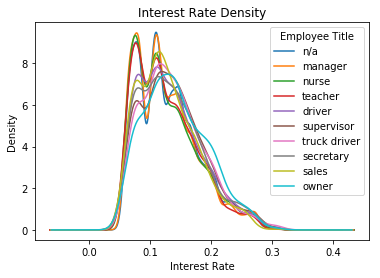

In [16]:

import matplotlib.pyplot as pyplot
import scipy.stats

titles = df_cleaned['emp_title_cleaned'].value_counts(dropna=False).head(10).index
for title in titles:
  #print(f'Title: {title}')
  subset = df_cleaned[df_cleaned['emp_title_cleaned']==title]
  subset['int_rate_num'].plot.density()
  
leg = pyplot.legend(titles)
leg.set_title('Employee Title')
pyplot.title('Interest Rate Density')
pyplot.xlabel('Interest Rate')
pyplot.show()





---


*Assignment continues from here*


---



In [17]:
df_cleaned['term'].head()

0     36 months
1     36 months
2     36 months
3     60 months
4     36 months
Name: term, dtype: object

In [18]:

def parseMonths(monthStr: str):
  # This could be a lambda
  # But I prefer to avoid anything but the simplest lambdas
  # As they can lead to unmaintainable code
  return(int(monthStr.strip().split(' ')[0]))

df_cleaned['term_months'] = df_cleaned['term'].apply(parseMonths)

df_cleaned['term_months'].head()


0    36
1    36
2    36
3    60
4    36
Name: term_months, dtype: int64

In [19]:
df_cleaned['loan_status_is_great'] = df_cleaned['loan_status']. \
                                            map({'Fully Paid': 1, 
                                                 'Current': 1}). \
                                            fillna(value=0). \
                                            astype('int64')
df_cleaned['loan_status_is_great'].head()

0    1
1    1
2    0
3    1
4    1
Name: loan_status_is_great, dtype: int64

In [20]:
df_cleaned['last_pymnt_d_month'] = df_cleaned['last_payment'].dt.month
df_cleaned['last_pymnt_d_year'] = df_cleaned['last_payment'].dt.year

df_cleaned[['last_pymnt_d_month', 'last_pymnt_d_year']].head()

,last_pymnt_d_month,last_pymnt_d_year
0,7.0,2019.0
1,7.0,2019.0
2,6.0,2019.0
3,7.0,2019.0
4,7.0,2019.0


# STRETCH OPTIONS

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

In [21]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
!tar -xzf instacart_online_grocery_shopping_2017_05_01.tar.gz
!ls -AlZ



--2019-09-05 20:59:43--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.108.77
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.108.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  32.2MB/s    in 21s     

2019-09-05 21:00:04 (9.39 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]

total 324628
drwxr-xr-x 1 root root  ?      4096 Aug 28 16:06 .config
drwxr-xr-x 2  502 staff ?      4096 May  2  2017 instacart_2017_05_01
-rw-r--r-- 1 root root  ? 205548478 Oct 20  2017 instacart_online_grocery_shopping_2017_05_01.tar.gz
-rw-r--r-- 1 root root  ? 104221495 Sep  1 04:37 LoanStats_2018Q4.csv
-rw-r--r-- 1 root root  ?  22631049 Sep  5 20:52 LoanStats_2018Q4

In [23]:
!ls -AlZ instacart_2017_05_01

total 696692
-rw-r--r-- 1 502 staff ?       226 May  2  2017 ._aisles.csv
-rw-r--r-- 1 502 staff ?      2603 May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff ?       226 May  2  2017 ._departments.csv
-rw-r--r-- 1 502 staff ?       270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff ?       226 May  2  2017 ._order_products__prior.csv
-rw-r--r-- 1 502 staff ? 577550706 May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff ?       226 May  2  2017 ._order_products__train.csv
-rw-r--r-- 1 502 staff ?  24680147 May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff ?       226 May  2  2017 ._orders.csv
-rw-r--r-- 1 502 staff ? 108968645 May  2  2017 orders.csv
-rw-r--r-- 1 502 staff ?       226 May  2  2017 ._products.csv
-rw-r--r-- 1 502 staff ?   2166953 May  2  2017 products.csv


In [26]:

!head instacart_2017_05_01/orders.csv
!tail instacart_2017_05_01/orders.csv

order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
2539329,1,prior,1,2,08,
2398795,1,prior,2,3,07,15.0
473747,1,prior,3,3,12,21.0
2254736,1,prior,4,4,07,29.0
431534,1,prior,5,4,15,28.0
3367565,1,prior,6,2,07,19.0
550135,1,prior,7,1,09,20.0
3108588,1,prior,8,1,14,14.0
2295261,1,prior,9,1,16,0.0
2307371,206209,prior,5,4,15,3.0
3186442,206209,prior,6,0,16,3.0
550836,206209,prior,7,2,13,9.0
2129269,206209,prior,8,3,17,22.0
2558525,206209,prior,9,4,15,22.0
2266710,206209,prior,10,5,18,29.0
1854736,206209,prior,11,4,10,30.0
626363,206209,prior,12,1,12,18.0
2977660,206209,prior,13,1,12,7.0
272231,206209,train,14,6,14,30.0


In [32]:

df_orders = pandas.read_csv('instacart_2017_05_01/orders.csv')
print(df_orders.describe())
df_orders.head()


           order_id       user_id  ...  order_hour_of_day  days_since_prior_order
count  3.421083e+06  3.421083e+06  ...       3.421083e+06            3.214874e+06
mean   1.710542e+06  1.029782e+05  ...       1.345202e+01            1.111484e+01
std    9.875817e+05  5.953372e+04  ...       4.226088e+00            9.206737e+00
min    1.000000e+00  1.000000e+00  ...       0.000000e+00            0.000000e+00
25%    8.552715e+05  5.139400e+04  ...       1.000000e+01            4.000000e+00
50%    1.710542e+06  1.026890e+05  ...       1.300000e+01            7.000000e+00
75%    2.565812e+06  1.543850e+05  ...       1.600000e+01            1.500000e+01
max    3.421083e+06  2.062090e+05  ...       2.300000e+01            3.000000e+01

[8 rows x 6 columns]


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [31]:
df_orders.isna().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [52]:

df_departments = pandas.read_csv('instacart_2017_05_01/departments.csv')
print(df_departments.describe())
df_departments.head()

       department_id
count      21.000000
mean       11.000000
std         6.204837
min         1.000000
25%         6.000000
50%        11.000000
75%        16.000000
max        21.000000


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [53]:

df_aisles = pandas.read_csv('instacart_2017_05_01/aisles.csv')
print(df_aisles.describe())
df_aisles.head()

         aisle_id
count  134.000000
mean    67.500000
std     38.826537
min      1.000000
25%     34.250000
50%     67.500000
75%    100.750000
max    134.000000


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [33]:
df_train = pandas.read_csv('instacart_2017_05_01/order_products__train.csv')
print(df_train.describe())
df_train.head()


           order_id    product_id  add_to_cart_order     reordered
count  1.384617e+06  1.384617e+06       1.384617e+06  1.384617e+06
mean   1.706298e+06  2.555624e+04       8.758044e+00  5.985944e-01
std    9.897326e+05  1.412127e+04       7.423936e+00  4.901829e-01
min    1.000000e+00  1.000000e+00       1.000000e+00  0.000000e+00
25%    8.433700e+05  1.338000e+04       3.000000e+00  0.000000e+00
50%    1.701880e+06  2.529800e+04       7.000000e+00  1.000000e+00
75%    2.568023e+06  3.794000e+04       1.200000e+01  1.000000e+00
max    3.421070e+06  4.968800e+04       8.000000e+01  1.000000e+00


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [40]:

df_products = pandas.read_csv('instacart_2017_05_01/products.csv')
print(df_products.describe())
df_products.head()


         product_id      aisle_id  department_id
count  49688.000000  49688.000000   49688.000000
mean   24844.500000     67.769582      11.728687
std    14343.834425     38.316162       5.850410
min        1.000000      1.000000       1.000000
25%    12422.750000     35.000000       7.000000
50%    24844.500000     69.000000      13.000000
75%    37266.250000    100.000000      17.000000
max    49688.000000    134.000000      21.000000


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [34]:
df_train.isna().sum()


order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [54]:
df_instacart = pandas.merge(df_aisles,
                  pandas.merge(df_departments,
                    pandas.merge(df_products,
                      pandas.merge(df_orders,df_train, 
                        on='order_id'),
                      on='product_id'),
                    on='department_id'),
                  on='aisle_id')
print(df_instacart.describe())
print(df_instacart.isna().sum())
df_instacart.head()

           aisle_id  department_id  ...  add_to_cart_order     reordered
count  1.384617e+06   1.384617e+06  ...       1.384617e+06  1.384617e+06
mean   7.130423e+01   9.839777e+00  ...       8.758044e+00  5.985944e-01
std    3.810409e+01   6.292830e+00  ...       7.423936e+00  4.901829e-01
min    1.000000e+00   1.000000e+00  ...       1.000000e+00  0.000000e+00
25%    3.100000e+01   4.000000e+00  ...       3.000000e+00  0.000000e+00
50%    8.300000e+01   8.000000e+00  ...       7.000000e+00  1.000000e+00
75%    1.070000e+02   1.600000e+01  ...       1.200000e+01  1.000000e+00
max    1.340000e+02   2.100000e+01  ...       8.000000e+01  1.000000e+00

[8 rows x 11 columns]
aisle_id                  0
aisle                     0
department_id             0
department                0
product_id                0
product_name              0
order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_o

,aisle_id,aisle,department_id,department,product_id,product_name,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered
0,1,prepared soups salads,20,deli,209,Italian Pasta Salad,1504504,839,train,27,1,13,30.0,27,0
1,1,prepared soups salads,20,deli,209,Italian Pasta Salad,1307275,29486,train,4,0,21,30.0,11,0
2,1,prepared soups salads,20,deli,209,Italian Pasta Salad,36461,50978,train,7,6,13,20.0,6,1
3,1,prepared soups salads,20,deli,209,Italian Pasta Salad,3209286,62858,train,16,6,9,7.0,4,0
4,1,prepared soups salads,20,deli,209,Italian Pasta Salad,1910087,99968,train,8,2,7,7.0,21,1


In [44]:
df_instacart['product_name'].value_counts(dropna=False).head(40)

Banana                                  18726
Bag of Organic Bananas                  15480
Organic Strawberries                    10894
Organic Baby Spinach                     9784
Large Lemon                              8135
Organic Avocado                          7409
Organic Hass Avocado                     7293
Strawberries                             6494
Limes                                    6033
Organic Raspberries                      5546
Organic Blueberries                      4966
Organic Whole Milk                       4908
Organic Cucumber                         4613
Organic Zucchini                         4589
Organic Yellow Onion                     4290
Organic Garlic                           4158
Seedless Red Grapes                      4059
Asparagus                                3868
Organic Grape Tomatoes                   3823
Organic Red Onion                        3818
Yellow Onions                            3762
Organic Baby Carrots              

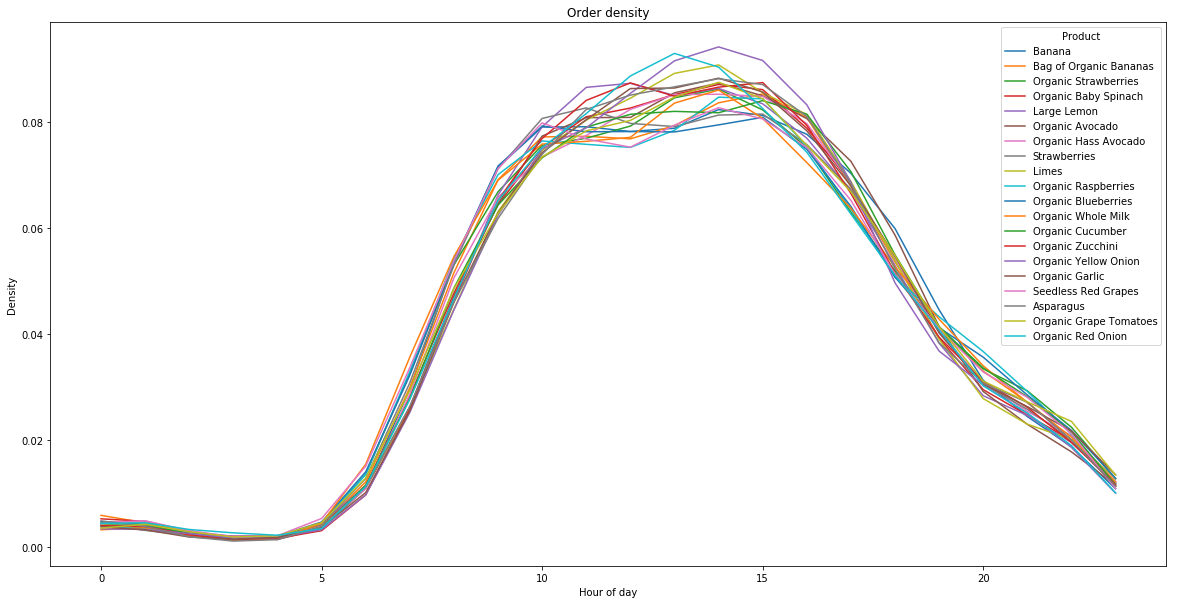

In [63]:

# 20 most popular products
products = df_instacart['product_name'].value_counts(dropna=False).head(20).index
for product in products:
  subset = df_instacart[df_instacart['product_name']==product]
  # Since we only have hourly data, we can use a range(24)
  subset['order_hour_of_day'].plot.density(ind=range(24))
  
leg = pyplot.legend(products)
leg.set_title('Product')
pyplot.title('Order density')
pyplot.xlabel('Hour of day')
pyplot.gcf().set_size_inches(20,10)
pyplot.show()

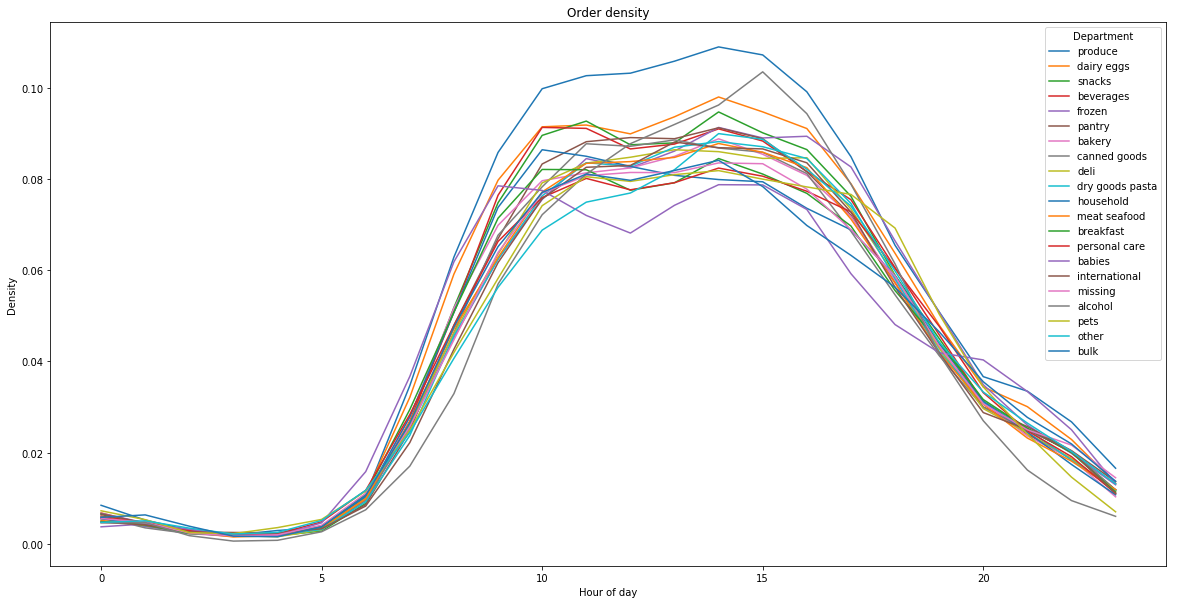

In [59]:
# By department
departments = df_instacart['department'].value_counts(dropna=False).index
for department in departments:
  subset = df_instacart[df_instacart['department']==department]
  subset['order_hour_of_day'].plot.density(ind=range(24))
  
leg = pyplot.legend(departments)
leg.set_title('Department')
pyplot.title('Order density')
pyplot.xlabel('Hour of day')
pyplot.gcf().set_size_inches(20,10)
pyplot.show()

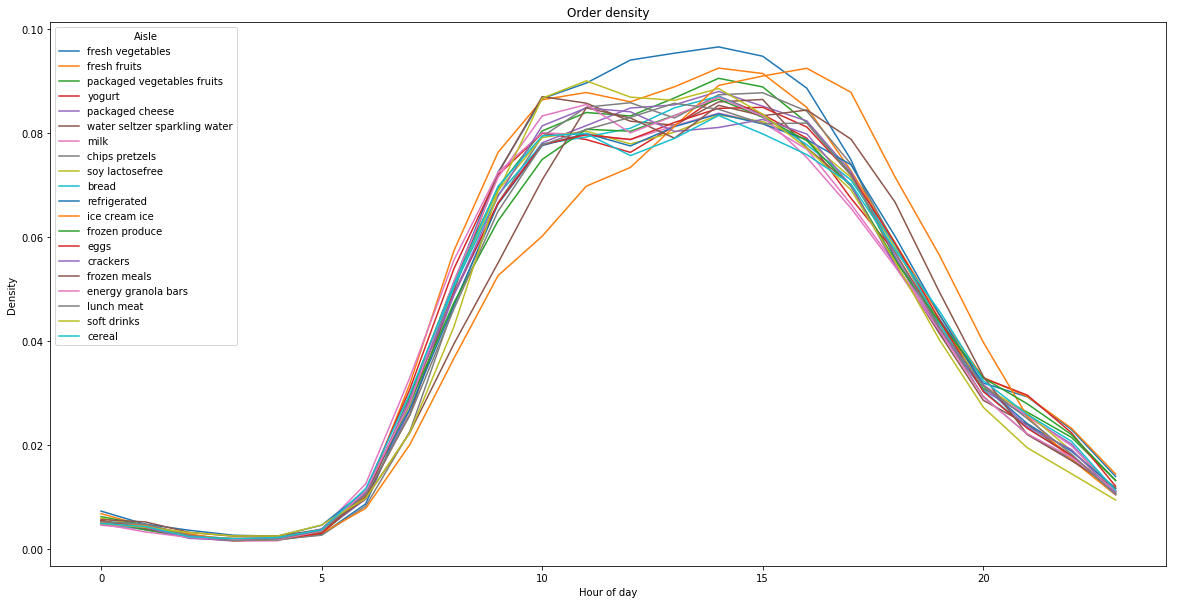

In [67]:
# By aisle
aisles = df_instacart['aisle'].value_counts(dropna=False).head(20).index
for aisle in aisles:
  subset = df_instacart[df_instacart['aisle']==aisle]
  subset['order_hour_of_day'].plot.density(ind=range(24))
  
leg = pyplot.legend(aisles)
leg.set_title('Aisle')
pyplot.title('Order density')
pyplot.xlabel('Hour of day')
pyplot.gcf().set_size_inches(20,10)
pyplot.show()

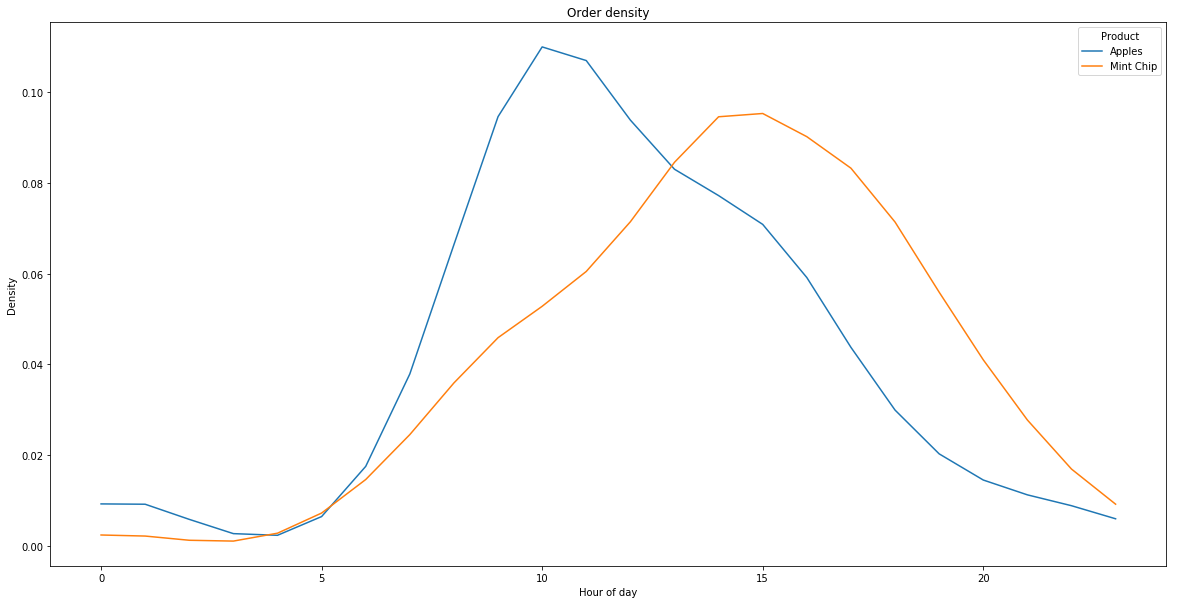

In [66]:
# Apples vs Mint Chip
df_instacart[df_instacart['product_name']=='Apples']['order_hour_of_day'].plot.density(ind=range(24))
df_instacart[df_instacart['product_name']=='Mint Chip']['order_hour_of_day'].plot.density(ind=range(24))
leg = pyplot.legend(['Apples', 'Mint Chip'])
leg.set_title('Product')
pyplot.title('Order density')
pyplot.xlabel('Hour of day')
pyplot.gcf().set_size_inches(20,10)
pyplot.show()